# Interactivity in Python with Jupyter Notebooks


In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Interactive Trig Graph

10/12/2018

The goal for the next day or so is to use interactivity to explore values of sine and cosine and possibly the tangent graph, let's see how this goes.

First of all I need to get the interactivity working. I will be trying to use the [ipywidget](https://ipywidgets.readthedocs.io/en/stable/index.html) library to generate some interactivity. According the docs, the easiest way to do this is to use the `interact` function in the library to ineract with plots.

The `interact()` function will display different things based on the arguments that it is passed in, the most basic implementation can be seen below, a handler function that returns the value of the interact widget is passed in to interact and then passed in different arguments. Given an integer value the

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    return(x)

# If you pass an integer it makes a slider
interact(f, x=10)

# If you pass in a string it makes a textbox
interact(f, x="Hello")

# If you pass in a boolean it creates a checkbox
interact(f, x=True)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

**Sweet, now that's working let's make a little ToDo list:**

- ~~Render sine and cosine graph~~
- Scatter red dot on both of them with value
- Slider that passes value to sine and cosine function
- Use the [interact reference](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) to learn more about interaction. 

~~this is struckthrough~~

I am going to be using the [artists reference](https://matplotlib.org/tutorials/intermediate/artists.html) for this little project.

### Figures First

First of all, we can instantiate a a figure, this is only for convenience, we are not strictly required to do this, however it is good practice, as we will sometimes be working with multiple figures.

I also change the x and y ticks to represent interesting values of the sine and cosine function.

interactive(children=(FloatSlider(value=0.0, description='x', max=6.283185307179586, min=-6.283185307179586), …

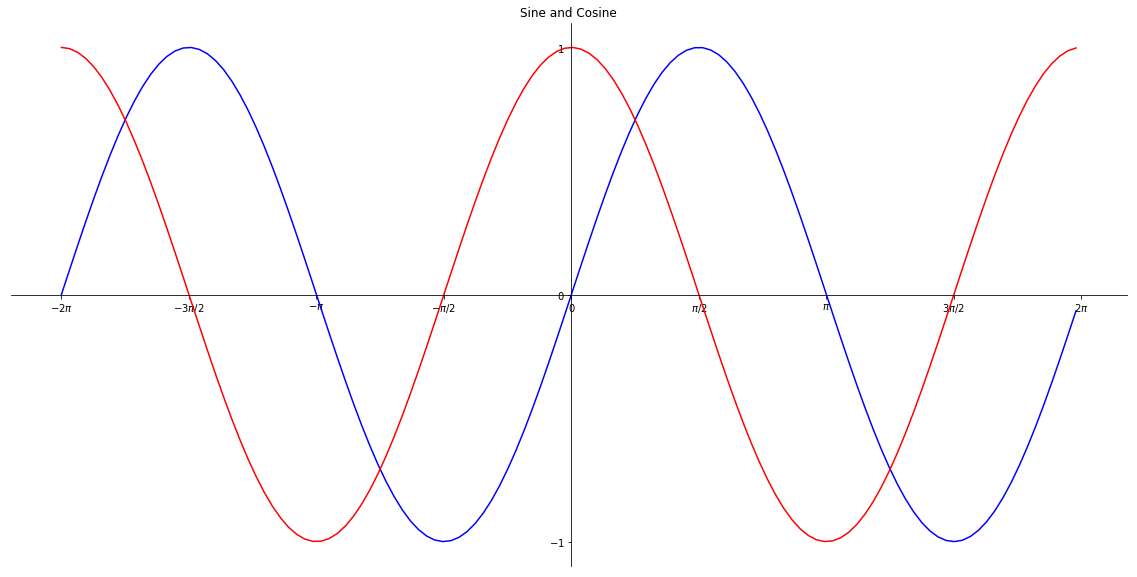

In [6]:
# The data that we will render over    
x = np.arange(-np.pi*2,np.pi*2,0.1)

# Create our sine and cosine functions
def sine(x):
    return(np.sin(x))

def cosine(x):
    return(np.cos(x))

def f(x):
    print("RENDER")
    render(x, False)

# Render the graph
def render(x, full):
    if full==True:
        fig = plt.figure(figsize=(20,10))

        # Move the spines
        ax = plt.gca()  # gca stands for 'get current axis' and allows for manipulation
        ax.spines['right'].set_color('none') # Discard the top and right axis
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data',0))
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('data',0))

        # Set the title
        plt.title("Sine and Cosine")

        # Change the xticks and yticks
        plt.xticks([-2*np.pi,-3*np.pi/2,-np.pi, -np.pi/2, 0, np.pi/2, np.pi,3*np.pi/2,2*np.pi],
                   [r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$',r'$-\pi/2$',r'$0$',
                    r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
        plt.yticks([-1,0,1],[r'$-1$',r'$0$',r'$1$'])


        # Create a figure, this will contain our two graphs.
        plt.plot(x, sine(x), 'b-', label="Sine")
        plt.plot(x, cosine(x), 'r-', label="Cosine")
    else:
        # Only update Scatter dot
        plt.scatter(x, sine(x))
        print(x)
    plt.show()

interact(f, x=widgets.FloatSlider(min=-2*np.pi, max=2*np.pi, step=0.1))
render(x, True)